In [ ]:
# 텐서플로우 케라스진해인데 텐서플로우 2.0 이상 버전은 케라스와 합쳐져서 같은 개념이다. 크게 문제 안됨 일단은 텐서플로우에 집중이다. 케라스가 텐서플로웨 합쳐진거라서.
import tensorflow as tf
tf.__version__

'2.9.2'

## Tensor 정의

In [ ]:
a = tf.constant(5)
b = tf.constant(10)
c = tf.constant(15)

In [ ]:
string = tf.constant('tensorflow')
print(string)

tf.Tensor(b'tensorflow', shape=(), dtype=string)


tensor를 numpy로

In [ ]:
print('tensor a:',a)
print('numpy a :', a.numpy())

tensor a: tf.Tensor(5, shape=(), dtype=int32)
numpy a : 5


In [ ]:
a_numpy = a.numpy()
type(a_numpy)

numpy.int32

tensor 랜덤 생성

In [ ]:
rand_tensor = tf.random.normal(shape=(2,2), mean=0., stddev=1.) # 정규분포에 따르는 평균이 0이고, 표준편차가 1인 랜덤한 값을 2x2로 뽑기. 
print('rand_tensor:', rand_tensor, rand_tensor.shape)

rand_tensor: tf.Tensor(
[[-0.47800013 -0.00505518]
 [-2.0669563  -0.5521313 ]], shape=(2, 2), dtype=float32) (2, 2)


In [ ]:
rand_tensor = tf.random.uniform(shape=(2,2), minval=0., maxval=1.)
print('rand_tensor:', rand_tensor, rand_tensor.shape)

rand_tensor: tf.Tensor(
[[0.22408581 0.6980212 ]
 [0.69419014 0.29814792]], shape=(2, 2), dtype=float32) (2, 2)


## 텐서 연산

tensor 인덱싱과 슬라이싱

In [ ]:
x_tensor = tf.constant([[1,2,3],[4,5,6]])
x_tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
print('first row:',x_tensor[0]) # 기본적으로 tf.tensor는 기본적으로 넘파이이다. 근데 어차피 다 텐서 형태라서 처리할때 텐서로 들어간다. 
print('second row:',x_tensor[1])
print('last row:',x_tensor[-1,:]) # -1: 마지막행, : 은 모든 데이터

print('-'*40)

print('first column:',x_tensor[:,0])
print('second column:',x_tensor[:,1])
print('last column:',x_tensor[:,-1])

print('-'*40)

print('second row, last column:',x_tensor[1,2])

first row: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
second row: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
last row: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
----------------------------------------
first column: tf.Tensor([1 4], shape=(2,), dtype=int32)
second column: tf.Tensor([2 5], shape=(2,), dtype=int32)
last column: tf.Tensor([3 6], shape=(2,), dtype=int32)
----------------------------------------
second row, last column: tf.Tensor(6, shape=(), dtype=int32)


tensor concatenate

In [ ]:
x_tensor = tf.constant([[1,2,3],[4,5,6]])

concatenated_dim0 = tf.concat([x_tensor,x_tensor], axis=0)
print('axis=0:', concatenated_dim0, concatenated_dim0.shape)

print('-'*40)

concatenated_dim1 = tf.concat([x_tensor,x_tensor], axis=1)
print('axis=1:', concatenated_dim1, concatenated_dim1.shape)

dim=0: tf.Tensor(
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]], shape=(4, 3), dtype=int32) (4, 3)
----------------------------------------
dim=1: tf.Tensor(
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]], shape=(2, 6), dtype=int32) (2, 6)


tensor 크기 변경

In [ ]:
print('x_tensor:', x_tensor, x_tensor.shape)

print('-'*40)
 
print('x_tensor reshape - 2x3 to 3x2 : ', tf.reshape(x_tensor,(3,2)))  #(3,2)은 어떻게 바꿀지 설정한다. 

x_tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) (2, 3)
----------------------------------------
x_tensor reshape - 2x3 to 3x2 :  tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


산술 연산

In [ ]:
add = tf.add(a,b)
print('add:', add)

sub = tf.subtract(a,b)
print('sub:', sub)

mul = tf.multiply(a,b)
print('mul:', mul)

div = tf.divide(a,b)
print('div:', div)

mean = tf.reduce_mean([a,b,c])
print('mean:', mean)

sum = tf.reduce_sum([a,b,c])
print('sum:', sum)

add: tf.Tensor(15, shape=(), dtype=int32)
sub: tf.Tensor(-5, shape=(), dtype=int32)
mul: tf.Tensor(50, shape=(), dtype=int32)
div: tf.Tensor(0.5, shape=(), dtype=float64)
mean: tf.Tensor(10, shape=(), dtype=int32)
sum: tf.Tensor(30, shape=(), dtype=int32)


In [ ]:
# Matrix Multiplication

x_tensor1 = tf.constant([[1,2,3],[4,5,6]])
x_tensor2 = tf.constant([[7,8,9],[10,11,12]])

mat_mul = tf.matmul(x_tensor1, tf.transpose(x_tensor2))
# tf.transpose : 행렬 곱을 만들기 위해 x_tensor2를 transpose 취함

print('mat_mul:', mat_mul, mat_mul.shape)

mat_mul: tf.Tensor(
[[ 50  68]
 [122 167]], shape=(2, 2), dtype=int32) (2, 2)


## 데이터

In [ ]:
from tensorflow.keras.datasets import mnist # 텐서플로우 안에 케라스에서 엠니스트 함수를 가져옴
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # 엠니스트 데이터 로드하기 즉 훈련데이터 셋과 테스트 데이터 셋을 저잘하고 출력한다. 각각 쌍으로 다운로드됨. 

In [ ]:
print('train data:', train_images.shape, len(train_labels)) # 6만개 훈련 데이터 이미지 28 x 28 이다. 
print('train labels:', train_labels)  # 훈련 데이터 이미지 데이터를 나타냄.
print('test data:', test_images.shape, len(test_labels)) # 만개의 이미지 28x28 픽셀로 구성
print('test labels:', test_labels) # 테스트 라벨의 이미지 데이터를 나타냄

train data: (60000, 28, 28) 60000
train labels: [5 0 4 ... 5 6 8]
test data: (10000, 28, 28) 10000
test labels: [7 2 1 ... 4 5 6]


In [ ]:
import matplotlib.pyplot as plt

label: 5


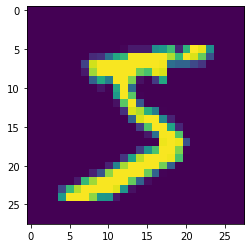

In [ ]:
image = train_images[0]  # 6만개 중에서 첫번쨰 이미지 가 5이다.
plt.imshow(image)  # 이미지로 나타내면 5이고
print('label:',train_labels[0]) # 그때 라벨 표시가 5인것을 확인함. 